# 雲端運算  HW1

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
import matplotlib.cm as cm

# 1.Nulls in Columns

In [40]:
df = pd.read_csv('./USvideos.csv')  
df.isnull().sum(axis=0)

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

# 2.What are the average values of"likes","dislikes","views","comment_count“ in 2017?

In [144]:
df2017 = df[df["publish_time"].between("2017-01-01","2017-12-31")]

In [146]:
target = ['likes','dislikes','views','comment_count']
for i in target:
    mean_df = df2017[i].mean()
    print('Average of '+str(i)+' : ',mean_df)

Average of likes :  48012.41246748242
Average of dislikes :  3002.7103767222275
Average of views :  1317414.4288467097
Average of comment_count :  5795.137007418826


# 3.Plot the boxplot of #dislikes for each month in 2017

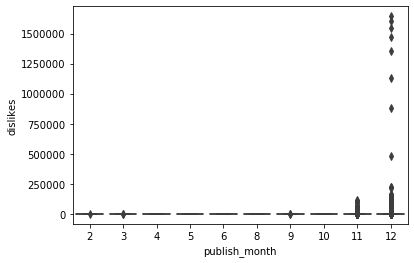

In [161]:
df2017 = df2017.assign(publish_month = df2017.publish_time.dt.month,publish_date = df2017.publish_time.dt.day)
sns.boxplot(x = 'publish_month',y = 'dislikes',data = df2017)

# 4. Plot the histogram of #views for each category in 2017 and 2018 in one figure.

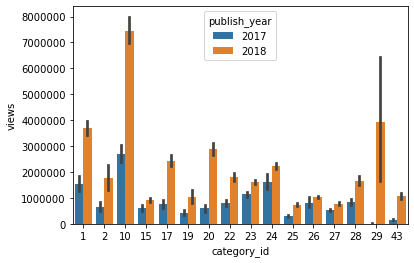

In [166]:
df1718 = df[df["publish_time"].between("2017-01-01","2018-12-31")]
df1718 = df1718.assign(category_id = df1718.category_id,publish_month = df1718.publish_time.dt.month,publish_year = df1718.publish_time.dt.year)
sns.barplot(x = 'category_id',y = 'views',data = df1718,hue="publish_year")

# 5.Write a myPCA.py from scratch

In [53]:
def myPCA(dataset_path,target_dim):
    c_count_list = []
    temp = []
    c_list = []
    c_index = []  #可知第幾個是第幾類id
    data_matrix=[]
    e_vector = []
    output = []
    c_data_matrix = []
    sample50 = []
    target = ['views', 'likes', 'dislikes','comment_count', 'comments_disabled', 'ratings_disabled','video_error_or_removed']
    df = pd.read_csv(dataset_path)  
    #id range 1~43 but 其中只有16種
    for i in df['category_id']:
        c_index.append(i)
        if i not in c_list:
            c_list.append(i) 


    for i in df['category_id']:
        temp.append(i)
    for c in c_list:
        c_count_list.append(temp.count(c))
    c_count = list(zip(c_list,c_count_list)) #(種類,總數)


    #過濾features
    for feature in target:
        tmp = []
        for i in df[feature]:
            tmp.append(i)
        data_matrix.append(tmp)
    data_matrix = np.array(data_matrix).T



    for i in c_list:
        temp = []
        for j in range(len(c_index)):
            if i == c_index[j]:
                temp.append(data_matrix[j])  
        c_data_matrix.append(temp)


    #開始PCA
    for i in range(0,len(c_data_matrix)):
        c_data_matrix[i] = np.array(c_data_matrix[i])
        c_id=c_data_matrix[i].T
        z = np.dot(c_id,c_id.T)
        cov_matrix = np.cov(z)
        e_value,e_vector=np.linalg.eig(z)
        e_vector = e_vector[0:2]  #function時把2改成input dim
        out = np.dot(c_data_matrix[i],e_vector.T)
        #print(out.shape)
        output.append(out)

    #每種隨機選50個
    for i in range(len(output)):
        select = random.sample(list(output[i]),50) 
        sample50.append(select)
    sample50 = np.array(sample50)

    return sample50, c_list

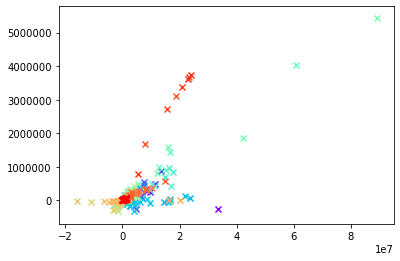

In [73]:
new_data_object ,c_list= myPCA('./USvideos.csv',2)

colors = iter(cm.rainbow(np.linspace(0, 1, 800)))
for y in range(0,16):
    for i in range(0,50):
        plt.scatter(new_data_object[y][i][0], new_data_object[y][i][1], color=next(colors),marker = 'x')

# 6. Plot the word cloud of “title”

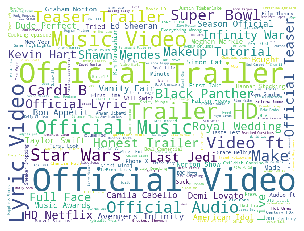

In [279]:
g_title = df[['title']]
t = ''
for i in range(len(g_title)):
    t  += ' ' + g_title.values[i][0]

word_c = WordCloud(width = 800,height = 600,background_color = 'white')
word_c.generate(t)

plt.imshow(word_c)
plt.axis('off')
plt.show()